# Análise exploratória de dados

In [186]:
from IPython.display import Image, display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Coleta de dados

In [187]:
df = pd.read_csv("../data/raw/Sleep_health_and_lifestyle_dataset.csv")

## 2. Visualização dos dados

In [188]:
display(df.head())

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [189]:
df.shape

(374, 13)

In [190]:
df = df.drop(["Person ID"], axis=1)

In [191]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


## 2. Descrição dos dados

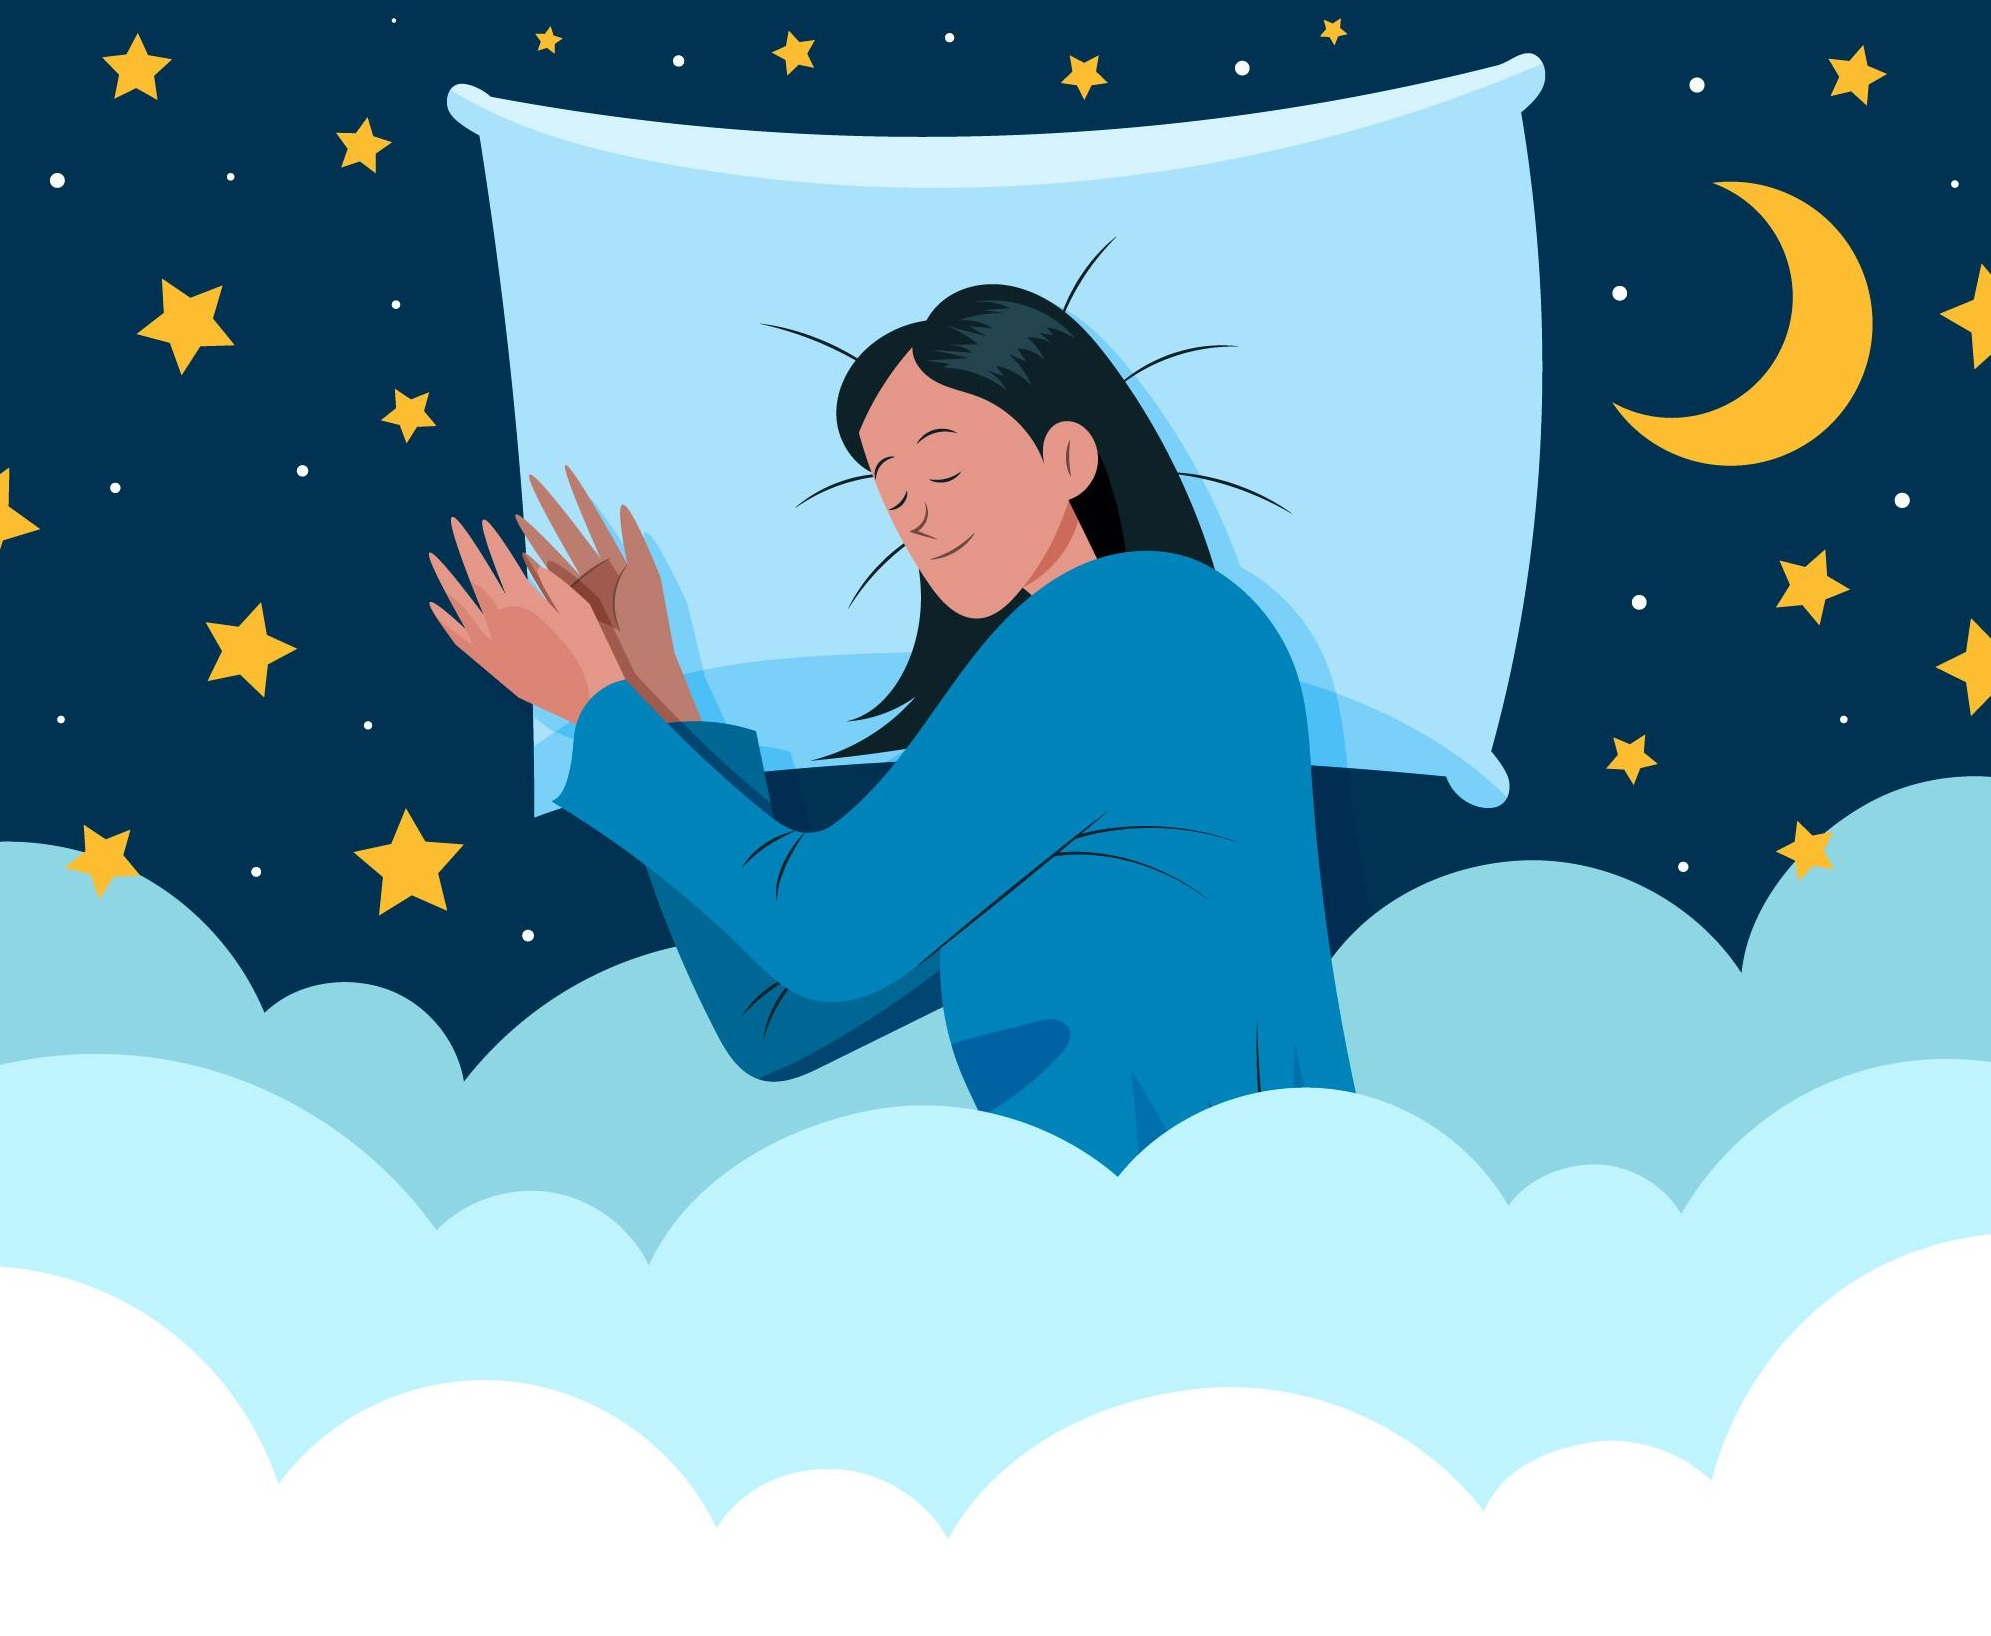

In [192]:
display(Image(filename='../docs/assets/images/sono.jpg', width=800))

O conjunto de dados de saúde do sono e estilo de vida compreende 400 linhas e 13 colunas, cobrindo uma ampla gama de variáveis relacionadas ao sono e hábitos diários. Inclui detalhes como sexo, idade, ocupação, duração do sono, qualidade do sono, nível de atividade física, níveis de estresse, categoria de IMC, pressão arterial, frequência cardíaca, passos diários e presença ou ausência de distúrbios do sono.

In [193]:
df["Gender"]

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
369    Female
370    Female
371    Female
372    Female
373    Female
Name: Gender, Length: 374, dtype: object

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


In [195]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [196]:
df["Occupation"].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [197]:
df["BMI Category"].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [198]:
df["Blood Pressure"].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [199]:
df["Sleep Disorder"].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [200]:
df.nunique()

Gender                      2
Age                        31
Occupation                 11
Sleep Duration             27
Quality of Sleep            6
Physical Activity Level    16
Stress Level                6
BMI Category                4
Blood Pressure             25
Heart Rate                 19
Daily Steps                20
Sleep Disorder              3
dtype: int64

## 2.1 Criando um dataframe

In [201]:
dicionario = pd.DataFrame([
    {
        "variavel": "Gender",
        "descrição": "O gênero da pessoa (Masculino/Feminino)",
        "tipo": "qualitativa",
        "subtipo": "nominal"

    },{
         "variavel": "Age",
        "descrição": "A idade da pessoa em anos",
        "tipo": "quantitativa",
        "subtipo": "discreta"
    },{
         "variavel": "Occupation",
        "descrição": "A ocupação ou profissão da pessoa",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },{
        "variavel": "Sleep Duration",
        "descrição": "O número de horas que a pessoa dorme por dia",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },{
         "variavel": "Quality of Sleep",
        "descrição": "Uma classificação subjetiva da qualidade do sono, variando de 1 a 10",
        "tipo": "quantitativa",
        "subtipo": "discreta"
    },{
         "variavel": "Physical Activity Level",
        "descrição": "O número de minutos que a pessoa pratica atividade física diariamente",
        "tipo": "quantitativa",
        "subtipo": "discreta"
    },{
         "variavel": "Stress Level",
        "descrição": "Uma classificação subjetiva do nível de estresse experimentado pela pessoa, variando de 1 a 10",
        "tipo": "quantitativa",
        "subtipo": "discreta"
    },{
        "variavel": "BMI Category",
        "descrição": "A categoria de IMC da pessoa (por exemplo, Abaixo do Peso, Normal, Sobrepeso)",
        "tipo": "qualitativa",
        "subtipo": "ordinal"
    },{
        "variavel": "Blood Pressure",
        "descrição": "A medição da pressão arterial da pessoa, indicada como pressão sistólica sobre pressão diastólica",
        "tipo": "qualitativa",
        "subtipo": "ordinal"
    },{
         "variavel": "Heart Rate",
        "descrição": "A frequência cardíaca em repouso da pessoa em batimentos por minuto",
        "tipo": "quantitativa",
        "subtipo": "discreta"
    },{
         "variavel": "Daily Steps",
        "descrição": "O número de passos que a pessoa dá por dia",
        "tipo": "quantitativa",
        "subtipo": "discreta"
    },{
        "variavel": "Sleep Disorder",
        "descrição": " A presença ou ausência de um distúrbio do sono na pessoa (Nenhum, Insônia, Apneia do Sono",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    }

])

dicionario.to_csv('../data/external/dictionary.csv', index=False)

dicionario

,variavel,descrição,tipo,subtipo
0,Gender,O gênero da pessoa (Masculino/Feminino),qualitativa,nominal
1,Age,A idade da pessoa em anos,quantitativa,discreta
2,Occupation,A ocupação ou profissão da pessoa,qualitativa,nominal
3,Sleep Duration,O número de horas que a pessoa dorme por dia,quantitativa,contínua
4,Quality of Sleep,Uma classificação subjetiva da qualidade do so...,quantitativa,discreta
5,Physical Activity Level,O número de minutos que a pessoa pratica ativi...,quantitativa,discreta
6,Stress Level,Uma classificação subjetiva do nível de estres...,quantitativa,discreta
7,BMI Category,"A categoria de IMC da pessoa (por exemplo, Aba...",qualitativa,ordinal
8,Blood Pressure,"A medição da pressão arterial da pessoa, indic...",qualitativa,ordinal
9,Heart Rate,A frequência cardíaca em repouso da pessoa em ...,quantitativa,discreta


São 12 variáveis, com 5 qualitativas, sendo 3 nominais 2 e ordinais e 7 quantitativas, sendo 6 discretas e 1 contínua.

## 2. Perguntas de partida e hipóteses

- Existem dados faltantes, se sim quantos e em quais variáveis?
- Qual a distribuição dos dados (variável por variável)?
- Existe alguma relação entre o gênero, o distúrbio do sono e as variáveis relacionadas ao sono e hábitos diários dos indivíduos?
- Existe alguma relação entre a ocupação, o distúrbio do sono e as variáveis relacionadas ao sono e hábitos diários dos indivíduos?
- Existe alguma relação entre o nível de estresse e o distúrbio do sono?
- Existem correlações entre variáveis relacionadas ao sono e hábitos diários dos indivíduos?

#### - Existem dados faltantes, se sim quantos e em quais variáveis?

In [202]:
df.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

Não existem valores faltantes neste dataset.

#### - Qual a distribuição dos dados (variável por variável)?

In [203]:
df.describe(include='all')

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
count,374,374.000000,374,374.000000,374.000000,374.000000,374.000000,374,374,374.000000,374.000000,374
unique,2,NaN,11,NaN,NaN,NaN,NaN,4,25,NaN,NaN,3
top,Male,NaN,Nurse,NaN,NaN,NaN,NaN,Normal,130/85,NaN,NaN,None
freq,189,NaN,73,NaN,NaN,NaN,NaN,195,99,NaN,NaN,219
mean,NaN,42.184492,NaN,7.132086,7.312834,59.171123,5.385027,NaN,NaN,70.165775,6816.844920,NaN
std,NaN,8.673133,NaN,0.795657,1.196956,20.830804,1.774526,NaN,NaN,4.135676,1617.915679,NaN
min,NaN,27.000000,NaN,5.800000,4.000000,30.000000,3.000000,NaN,NaN,65.000000,3000.000000,NaN
25%,NaN,35.250000,NaN,6.400000,6.000000,45.000000,4.000000,NaN,NaN,68.000000,5600.000000,NaN
50%,NaN,43.000000,NaN,7.200000,7.000000,60.000000,5.000000,NaN,NaN,70.000000,7000.000000,NaN
75%,NaN,50.000000,NaN,7.800000,8.000000,75.000000,7.000000,NaN,NaN,72.000000,8000.000000,NaN


- Há 374 valores em cada variável.
- Existem duas possíveis gêneros (Gender), 11 possíveis ocupações (Occupation), 4 possíveis  categoria de IMC (BMI Category), 25 possíveis medidas da pressão arterial (Blood Pressure) e 3 possíveis desordem do sono (Sleep Disorder).
- O gênero mais frequente é o Masculino (Male).
- A ocupação mais frequente é Enfermeira (Nurse).
- A categoria de IMC mais frequente é Normal.
- O pressão arterial  mais frequente é 130/85.
- A mediana das idades (Age) é de 43 anos, com uma idade mínima de 27 anos e idade máxima de 59 anos, aproximadamente
- A mediana da duração do sono (Sleep Duration) é de 7.13 h/dia, com um mínimo de 5.8 h/dia e máximo de 8,5 h/dia, aproximadamente
- A mediana da qualidade do sono (Quality of Sleep) é de 7, com um mínimo de 4 e máximo de 9.
- A mediana do nível de atividade física (Physical Activity Level) é de 60 minutos/dia, com um mínimo de 30 minutos/dia e máximo de 90 minutos/dia, aproximadamente
- A mediana do nível de estresse (Stress Level) é de 5, com um mínimo de 3 e máximo de 8.
- A mediana da frequência cardíaca (Heart Rate) é de 70 bpm, com um mínimo de 65 bpm e máximo de 86 bpm.
- A mediana de passos diários (Daily Steps) é de 7000 passos/dia, com um mínimo de 3000 passos/dia e máximo de 10000 passos/dia, aproximadamente

##### Distribuição das variáveis qualitativas

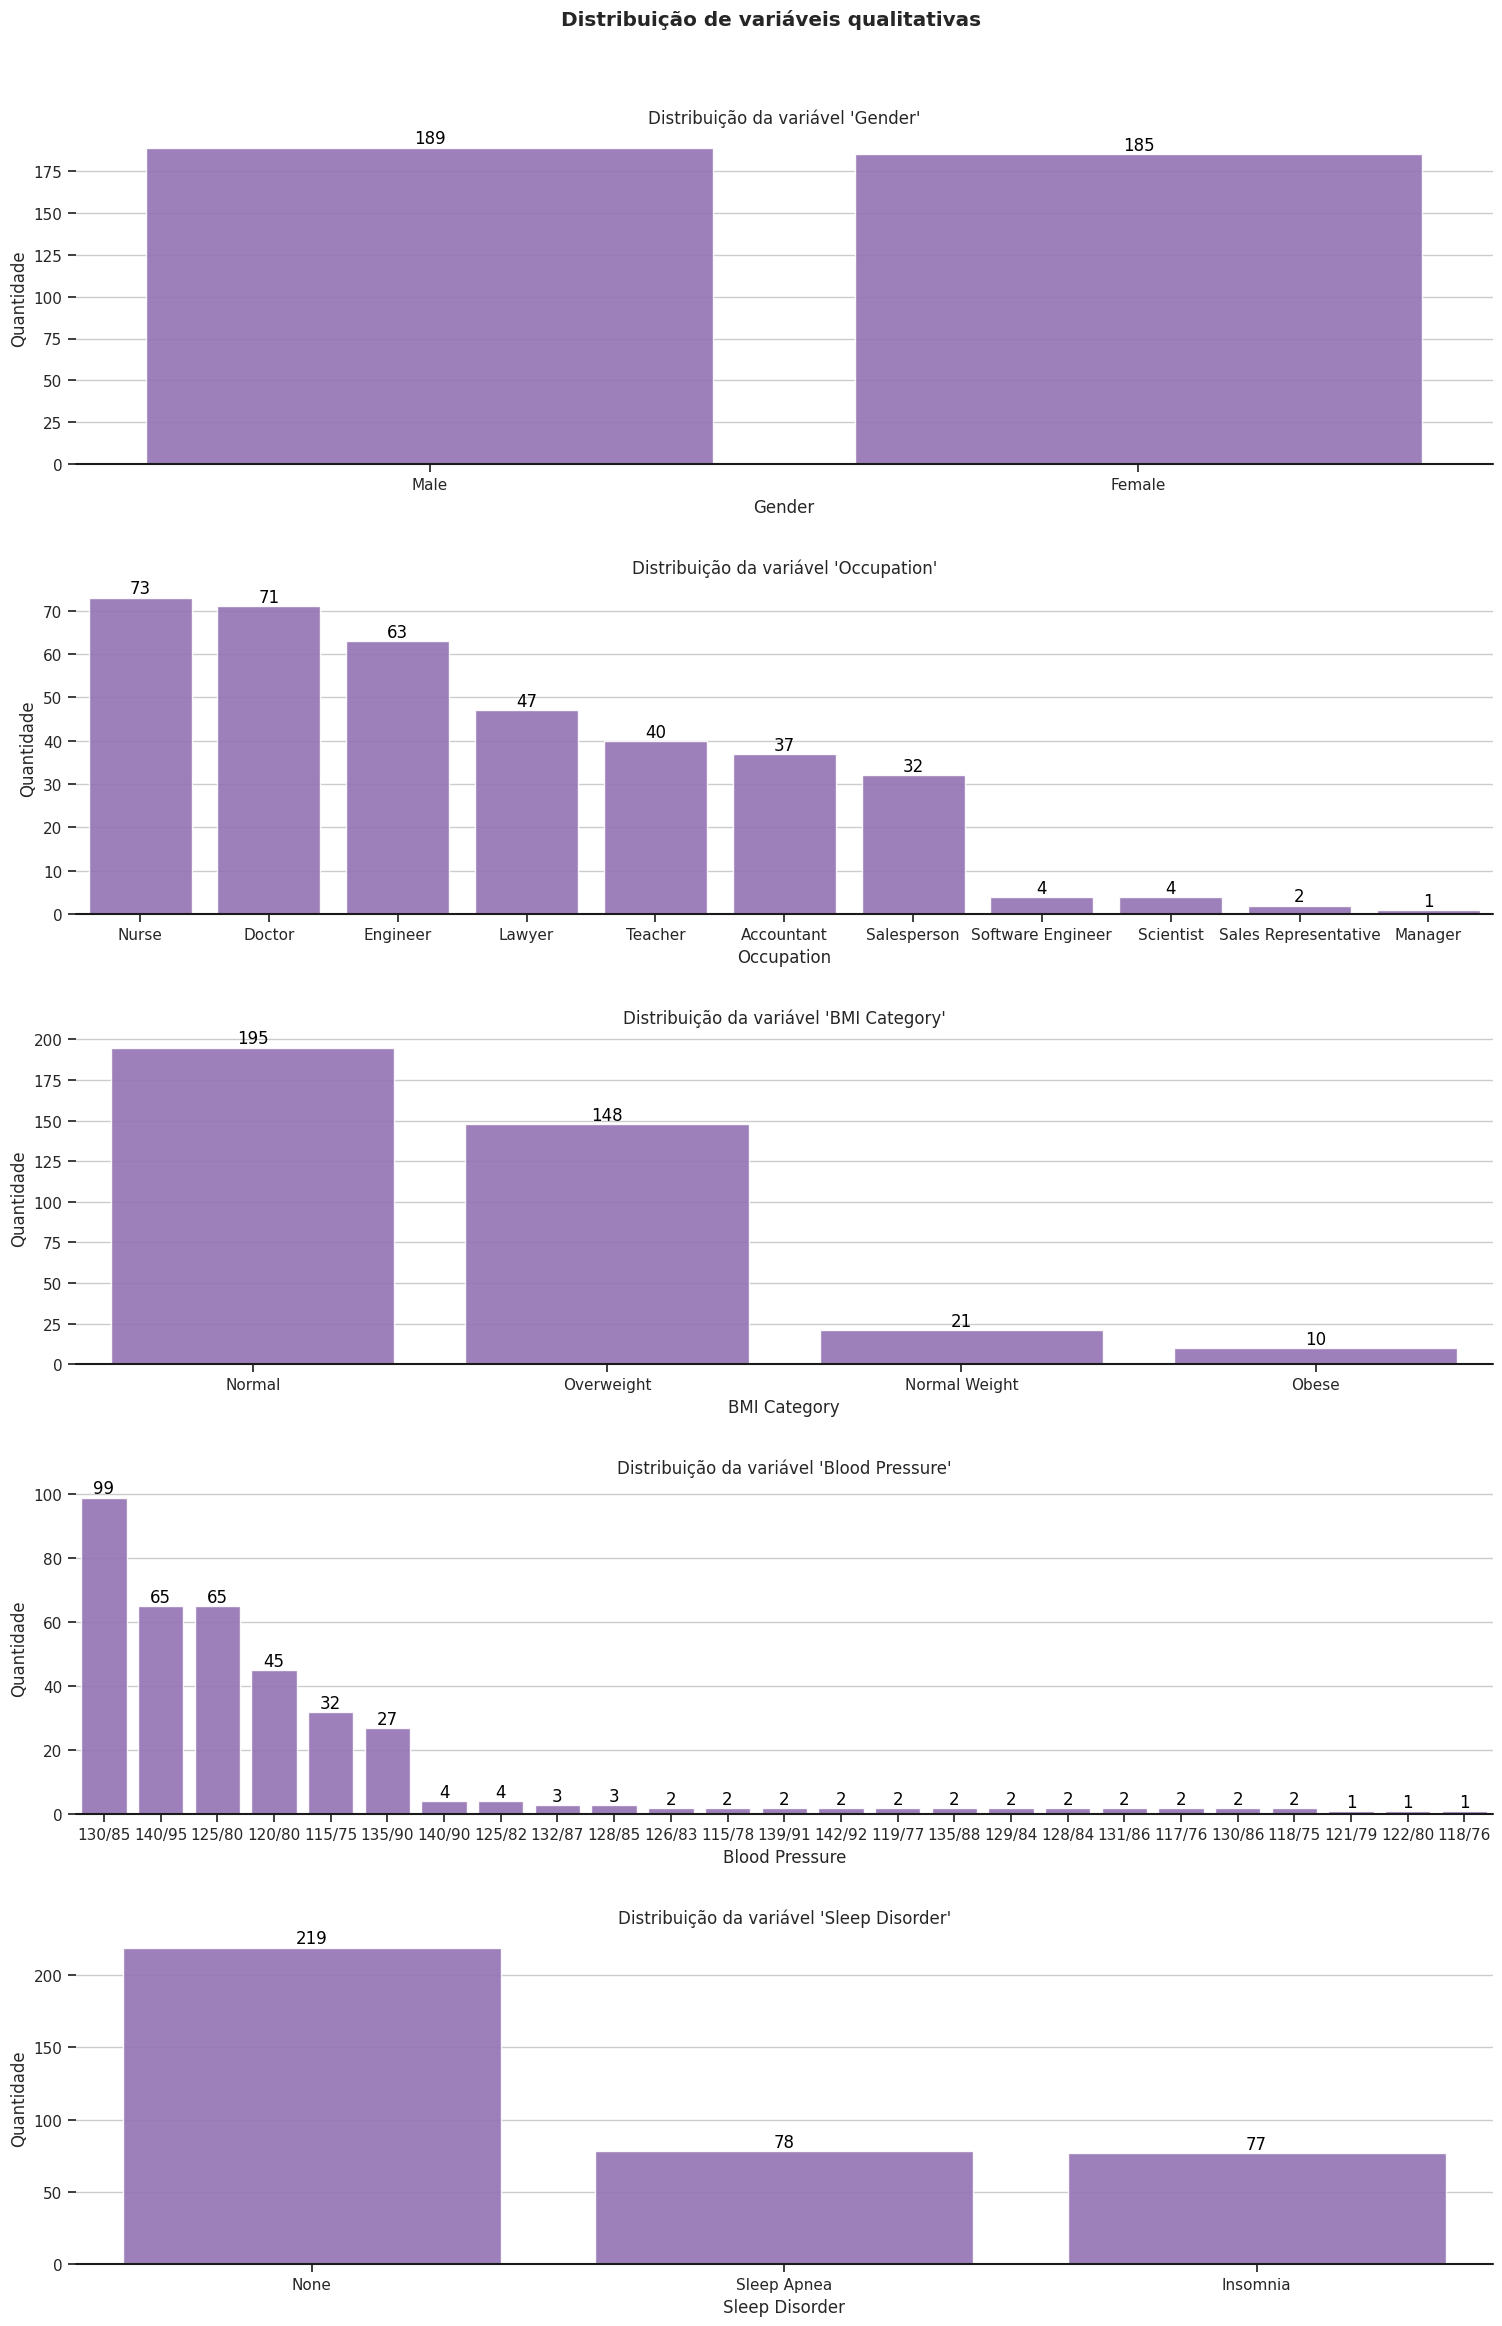

In [221]:
fig, axes = plt.subplots(5, 1, figsize=(18, 25))
plt.tight_layout(pad=10, w_pad=5, h_pad=5)
fig.suptitle('Distribuição de variáveis qualitativas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'qualitativa'").variavel.to_list()):
    order = df[variavel].value_counts().index
    ax = sns.countplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
        order=order
    )
    ax.bar_label(
        ax.containers[0],
        fmt='%.0f',
        color='black'
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
plt.show()

A partir das visualizações nos gráficos acima, é possível observar: 

- O gênero masculino existe em maior quantidade, mas com uma pequena diferença em relação ao gênero feminino.
- A ocupação Enfermeira (Nurse) é mais presente entre as pessoas.
- A maioria das pessoas possuem o IMC normal.
- A maioria das pessoas não possuem distúrbio do sono.

##### Distribuição das variáveis quantitativas

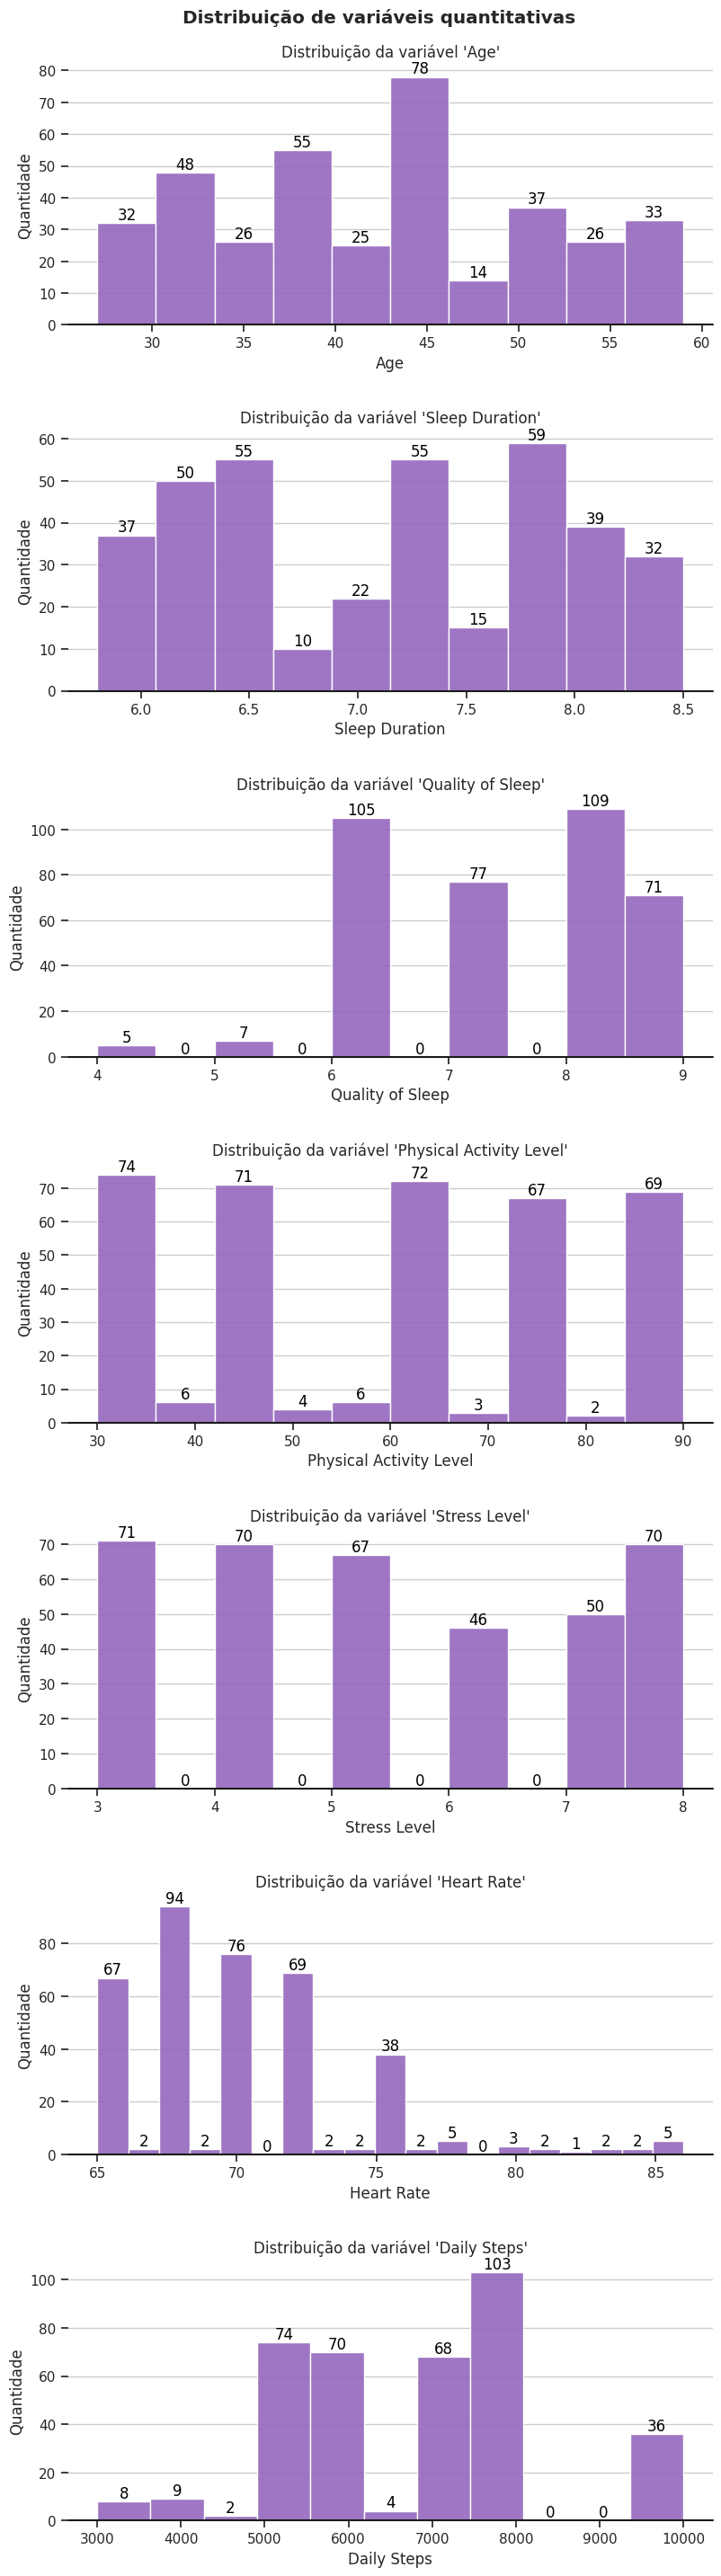

In [252]:
fig, axes = plt.subplots(7, 1, figsize=(10, 30))
plt.tight_layout(pad=7, w_pad=4, h_pad=5)
fig.suptitle('Distribuição de variáveis quantitativas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'quantitativa'").variavel.to_list()):
    ax = sns.histplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
    )
    ax.bar_label(
        ax.containers[0],
        fmt='%.0f',
        color='black'
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    plt.xlabel(variavel)
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
plt.show()

Visualizando os histogramas acima podemos observar que:

- A distribuição da variável idade tem valores mais frequentes próximos de 45.
- A distribuição da duração do sono tem talvez três modas.
- A distribuição da qualidade do sono tende a apresentar valores maiores do que 6.
- A distribuição do nível de atividade física apresenta muitos picos, sinalizando um histograma multimodal.
- A distribuição de nível de estresse apresenta valores com quantidade quase constante.
- A distribuição da frequência cardíaca apresenta na sua maior quantidade valores menores que 76 bpm.
- A distribuição do número de passoa tem valores mais frequentes próximo de 8000 passos/dia.

#### - Existe alguma relação entre o gênero, o distúrbio do sono e as variáveis relacionadas ao sono e hábitos diários dos indivíduos?

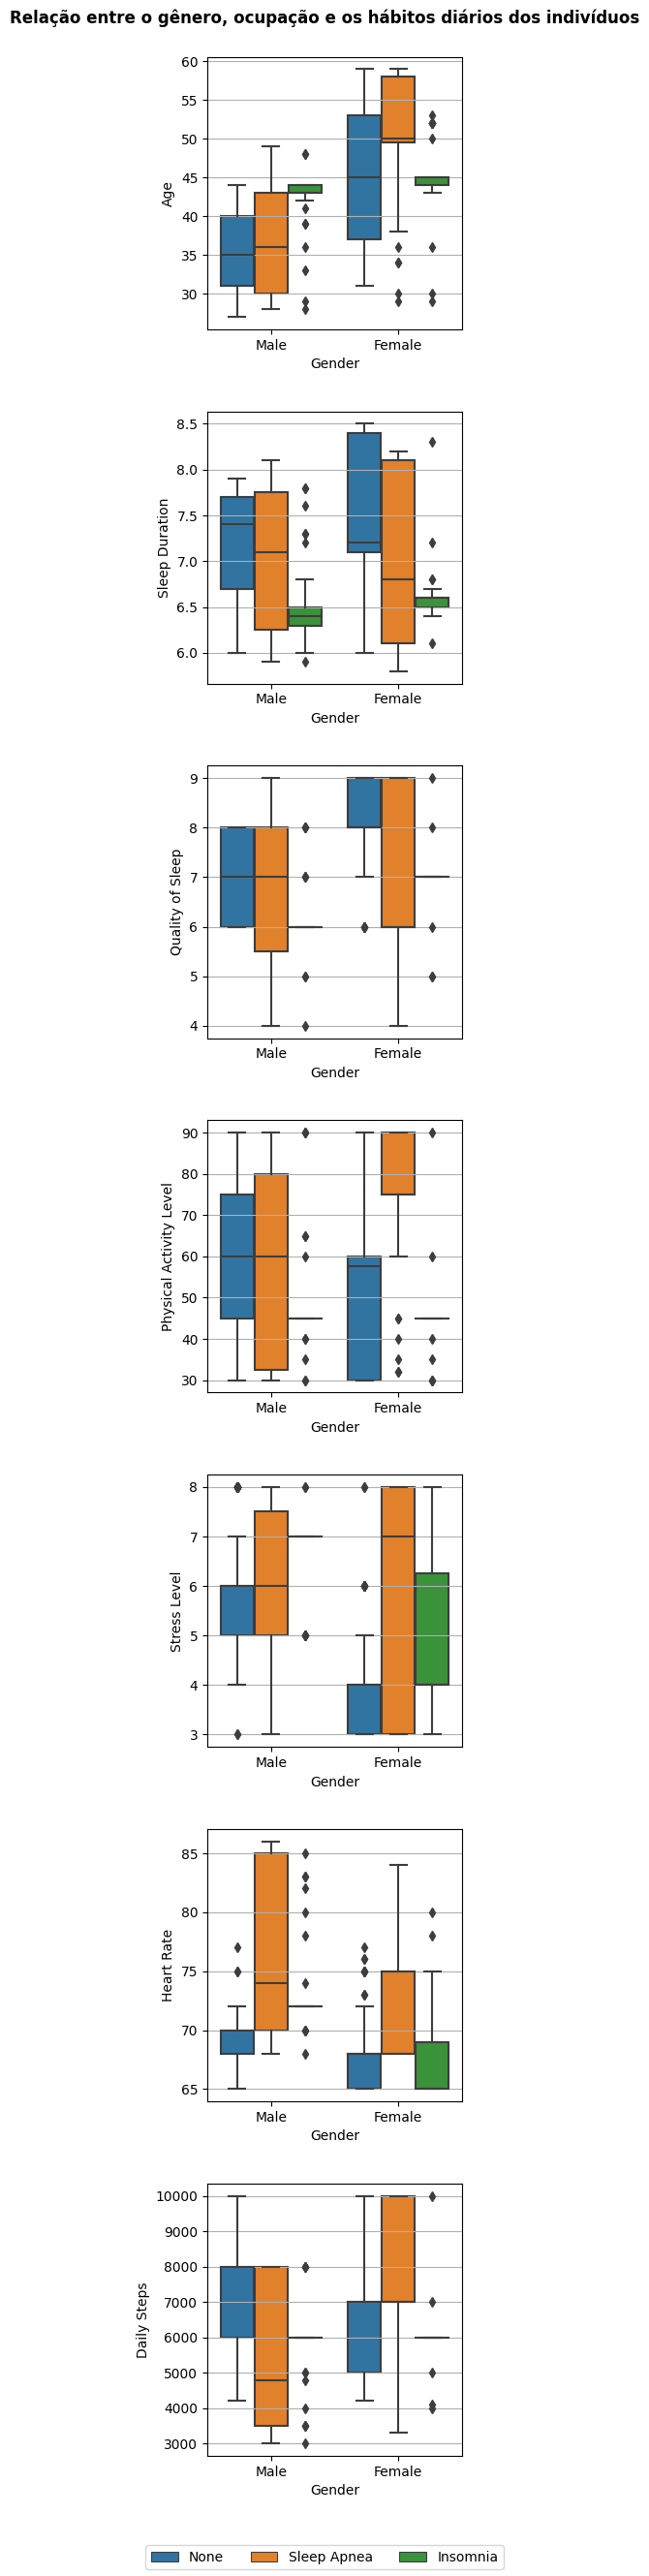

In [75]:
fig, axes = plt.subplots(7, 1, figsize=(5,27))
plt.tight_layout(pad=7, w_pad=4, h_pad=4)
fig.suptitle('Relação entre o gênero, o distúrbio do sono e as variáveis relacionadas ao sono e hábitos diários dos indivíduos', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'quantitativa'").variavel.to_list()):
    ax = sns.boxplot(
        x="Gender", 
        y=variavel, 
        hue="Sleep Disorder", 
        data=df, 
        ax=axes.flatten()[i]
    )
    handles, labels = plt.gca().get_legend_handles_labels()
    ax.grid(axis='y', linestyle='-')
    ax.legend([],[], frameon=False)
# sns.despine(offset=2, trim=True)
fig.legend(handles, labels, loc='lower center', ncol=3)
plt.show()

Visualizando os gráficos boxplot acima podemos observar que:

- É possível perceber que o apnéia do sono é dado em sua maioria ao sexo masculino.
- A insônia é apresentada em menor quantidade e com uma tendência maior de ter outliers, em todas as variáveis.
- Na variável nível de atividade físicas, nível de estresse e passos diários, o distúrbio do sono normal é igual para os dois gêneros.

#### - Existe alguma relação entre a ocupação, o distúrbio do sono e as variáveis relacionadas ao sono e hábitos diários dos indivíduos?

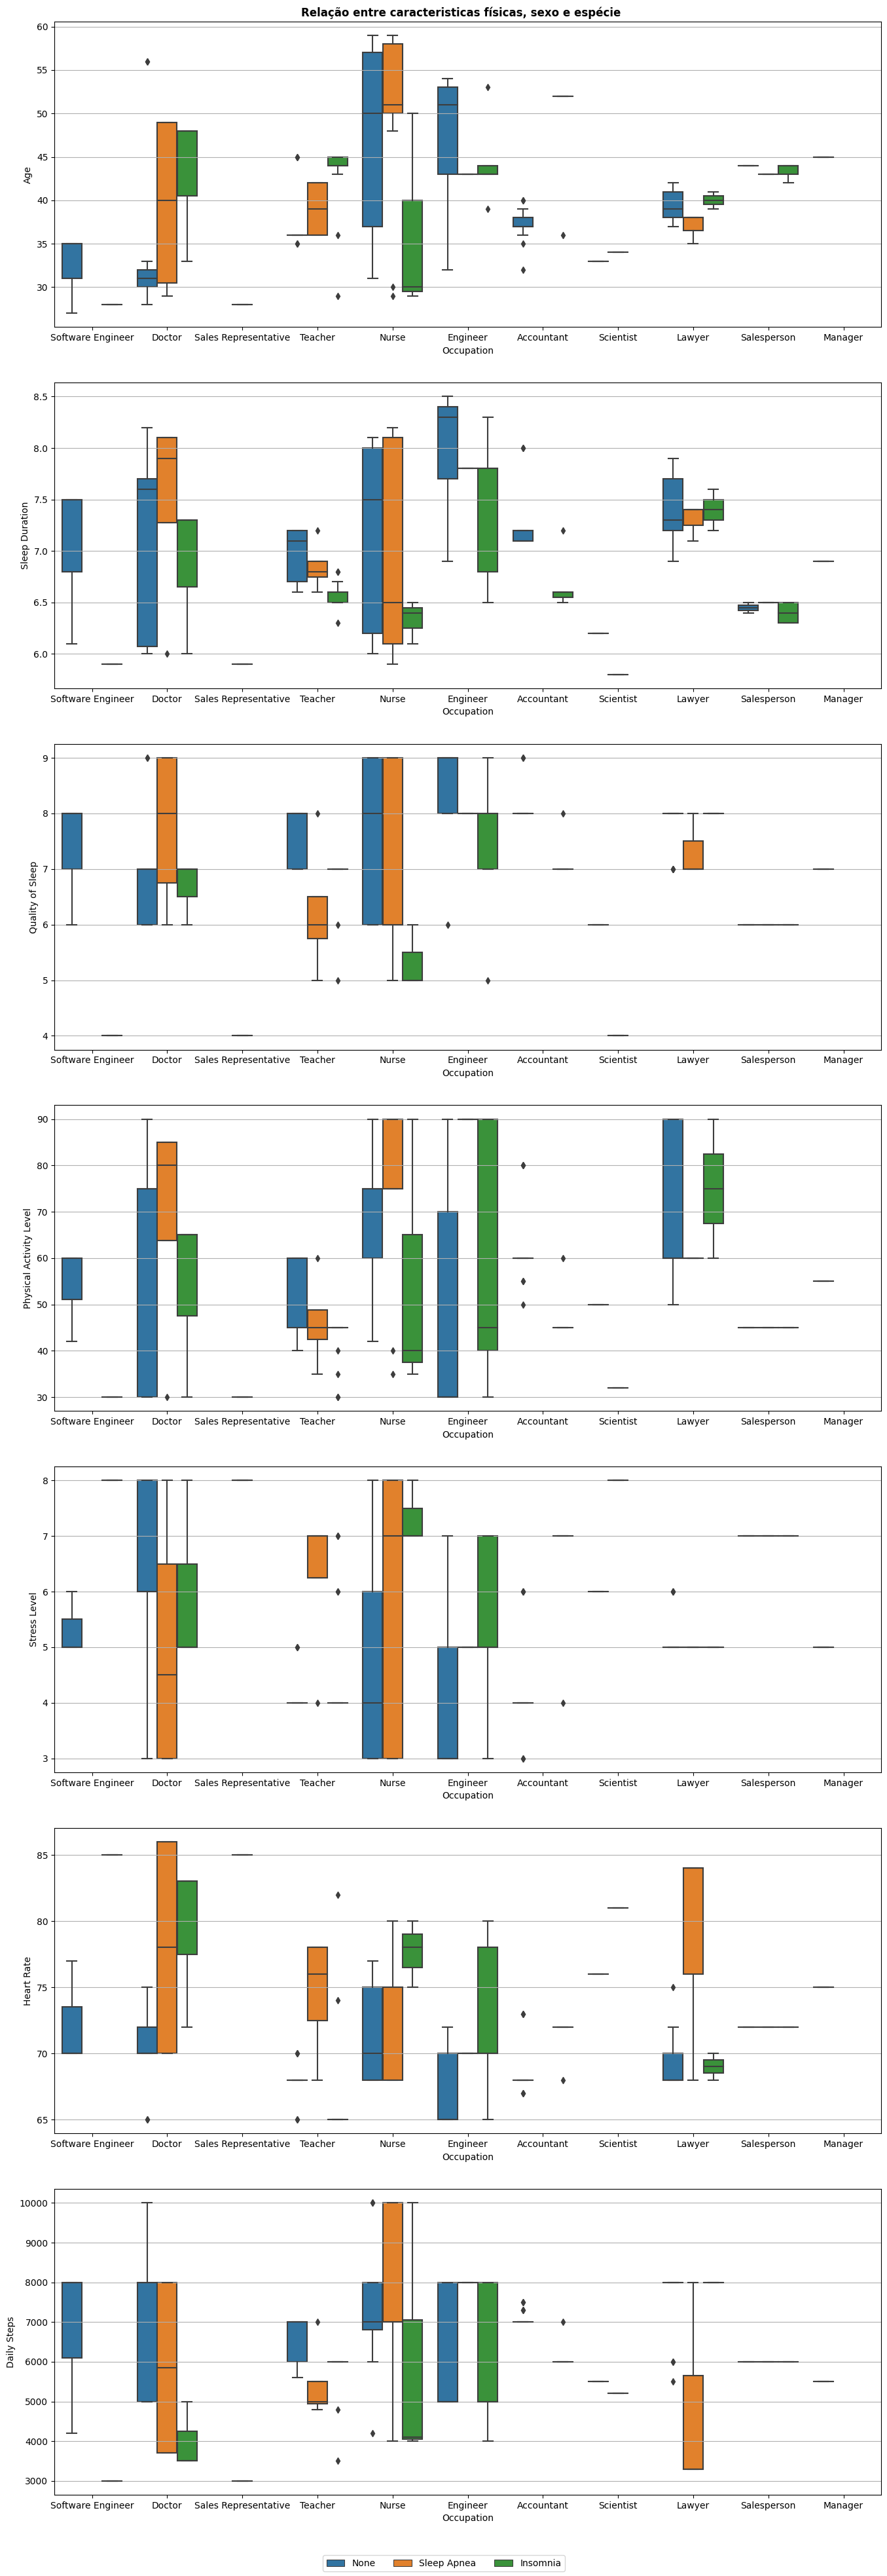

In [140]:
fig, axes = plt.subplots(7, 1, figsize=(15,40))
plt.tight_layout(pad=7, w_pad=4, h_pad=4)
fig.suptitle('Relação entre caracteristicas físicas, sexo e espécie', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'quantitativa'").variavel.to_list()):
    ax = sns.boxplot(
        x="Occupation", 
        y=variavel, 
        hue="Sleep Disorder", 
        data=df, 
        ax=axes.flatten()[i]
    )
    handles, labels = plt.gca().get_legend_handles_labels()
    ax.grid(axis='y', linestyle='-')
    ax.legend([],[], frameon=False)
# sns.despine(offset=2, trim=True)
fig.legend(handles, labels, loc='lower center', ncol=3)
plt.show()

#### - Existe alguma relação entre o IMC, o distúrbio do sono e as variáveis relacionadas ao sono e hábitos diários dos indivíduos?

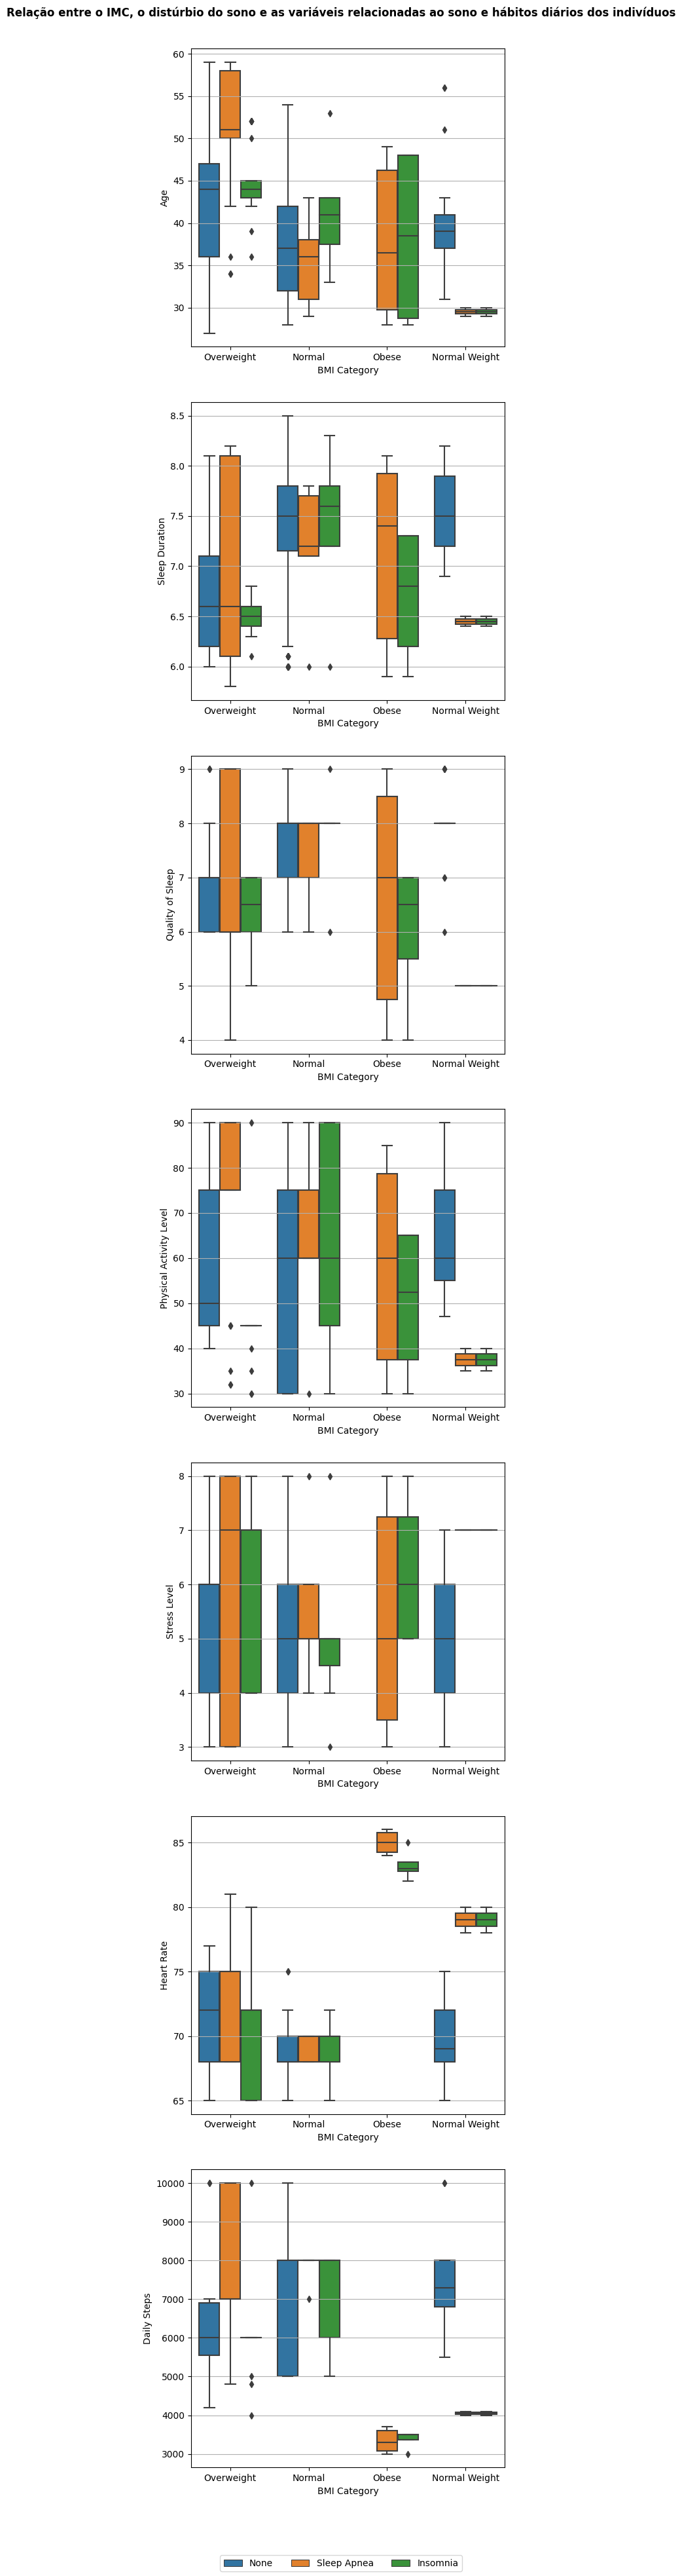

In [92]:
fig, axes = plt.subplots(7, 1, figsize=(8,40))
plt.tight_layout(pad=10, w_pad=4, h_pad=4)
fig.suptitle('Relação entre o IMC, o distúrbio do sono e as variáveis relacionadas ao sono e hábitos diários dos indivíduos', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'quantitativa'").variavel.to_list()):
    ax = sns.boxplot(
        x="BMI Category", 
        y=variavel, 
        hue="Sleep Disorder", 
        data=df, 
        ax=axes.flatten()[i]
    )
    handles, labels = plt.gca().get_legend_handles_labels()
    ax.grid(axis='y', linestyle='-')
    ax.legend([],[], frameon=False)
# sns.despine(offset=2, trim=True)
fig.legend(handles, labels, loc='lower center', ncol=3)
plt.show()

#### - Existe alguma relação entre pressão arterial, o distúrbio do sono e as variáveis relacionadas ao sono e hábitos diários dos indivíduos?

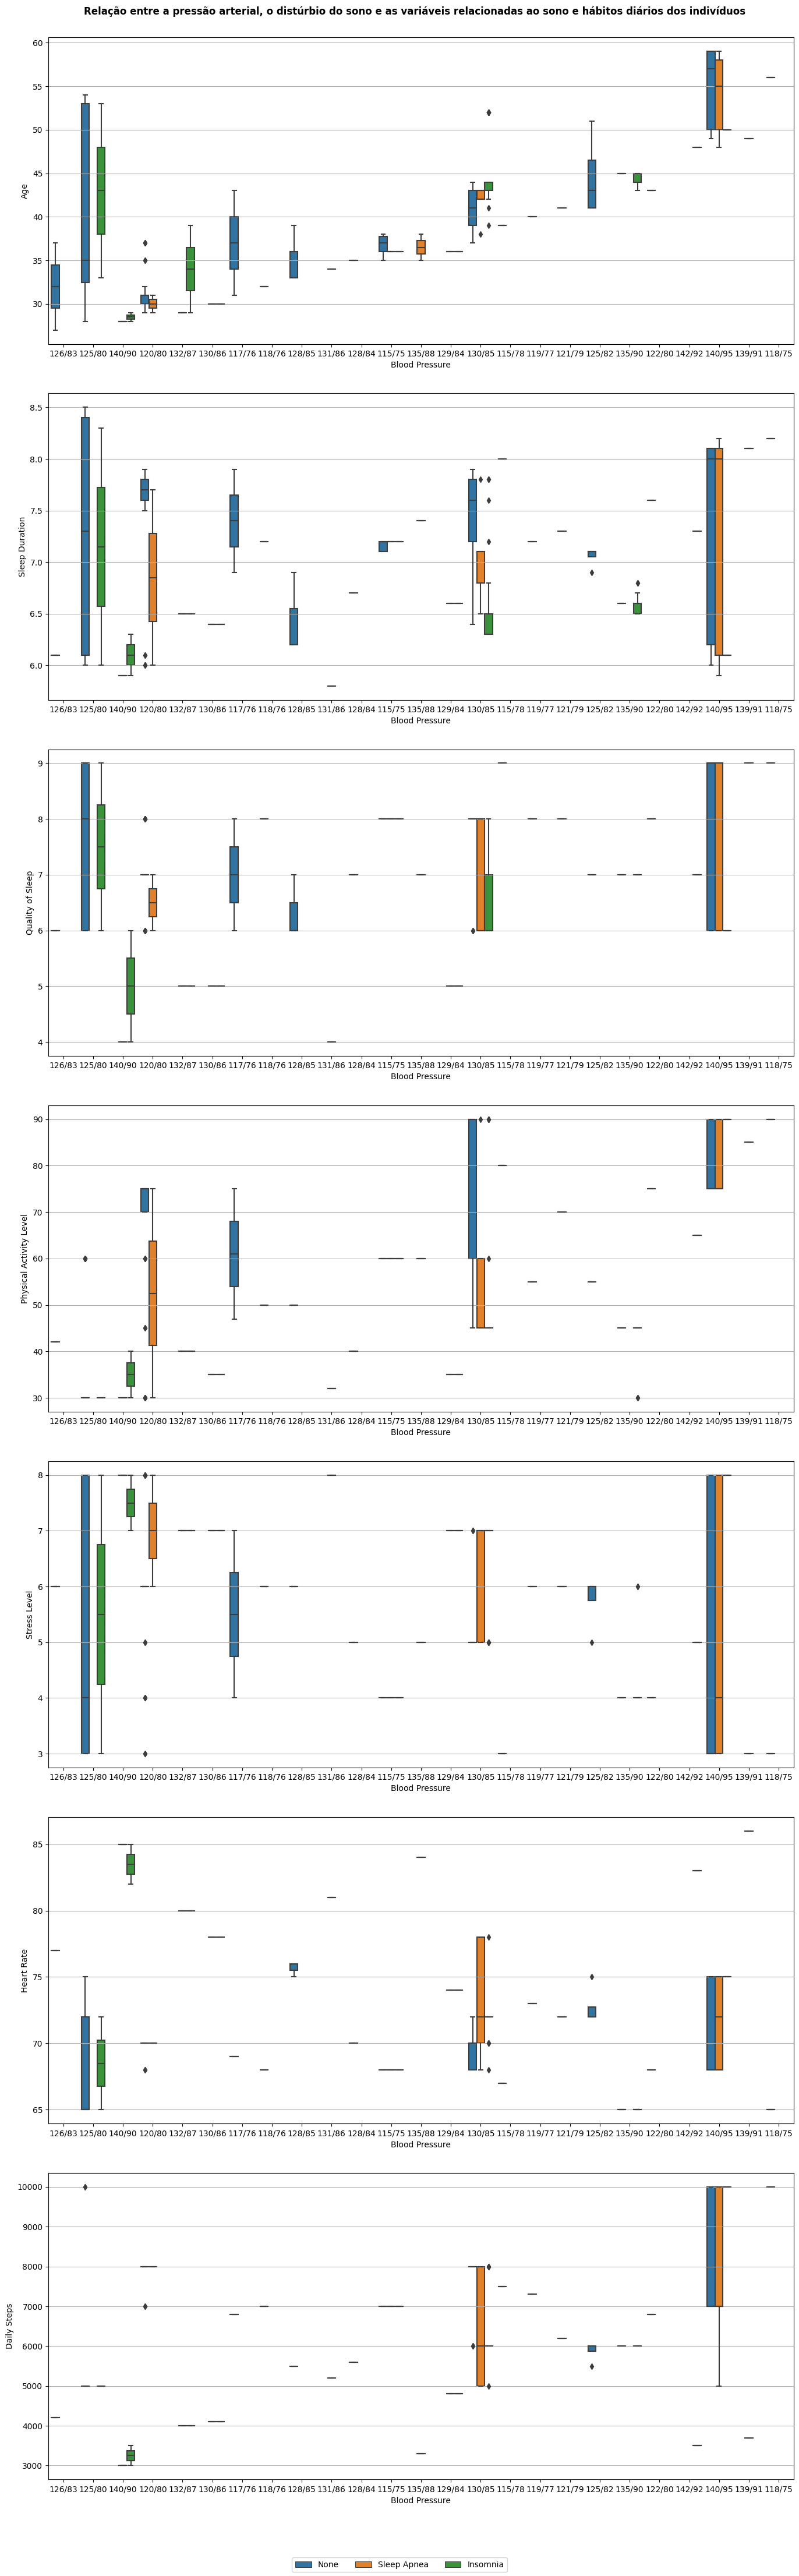

In [102]:
fig, axes = plt.subplots(7, 1, figsize=(16,45))
plt.tight_layout(pad=10, w_pad=4, h_pad=4)
fig.suptitle('Relação entre a pressão arterial, o distúrbio do sono e as variáveis relacionadas ao sono e hábitos diários dos indivíduos', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'quantitativa'").variavel.to_list()):
    ax = sns.boxplot(
        x="Blood Pressure", 
        y=variavel, 
        hue="Sleep Disorder", 
        data=df, 
        ax=axes.flatten()[i]
    )
    handles, labels = plt.gca().get_legend_handles_labels()
    ax.grid(axis='y', linestyle='-')
    ax.legend([],[], frameon=False)
# sns.despine(offset=2, trim=True)
fig.legend(handles, labels, loc='lower center', ncol=3)
plt.show()

- Existem correlações entre variáveis relacionadas ao sono e hábitos diários dos indivíduos?

/tmp/ipykernel_10112/3609626878.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


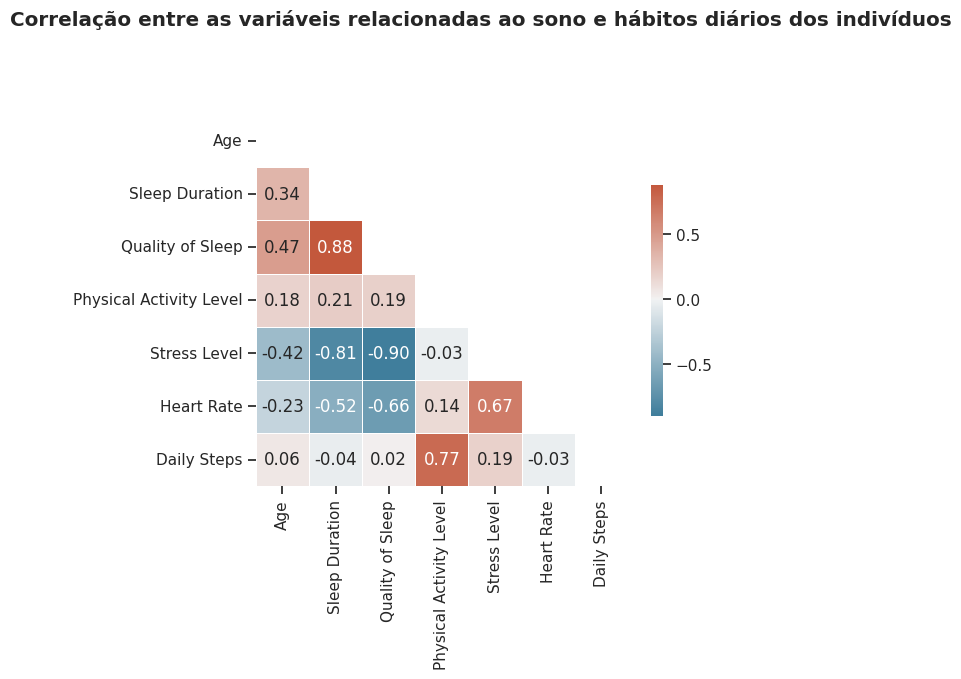

In [275]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(6,6))
ax = sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    annot=True, 
    fmt=".2f"
)
ax.grid(False)

plt.suptitle(f"Correlação entre as variáveis relacionadas ao sono e hábitos diários dos indivíduos", fontweight='bold')
plt.show()

A partir do gráfico de correlação, é possível observar:
    
- Existe uma correlação forte entre a qualidade do sono e a duração do sono, assim como passos diários e o nivel de atividade física.
- Existe uma correlação moderada entre a frequência cardíaca e nível de estresse, assim como a qualidade do sono e a idade.

/home/luanaoliveira/.cache/pypoetry/virtualenvs/src-zEwhE6y4-py3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


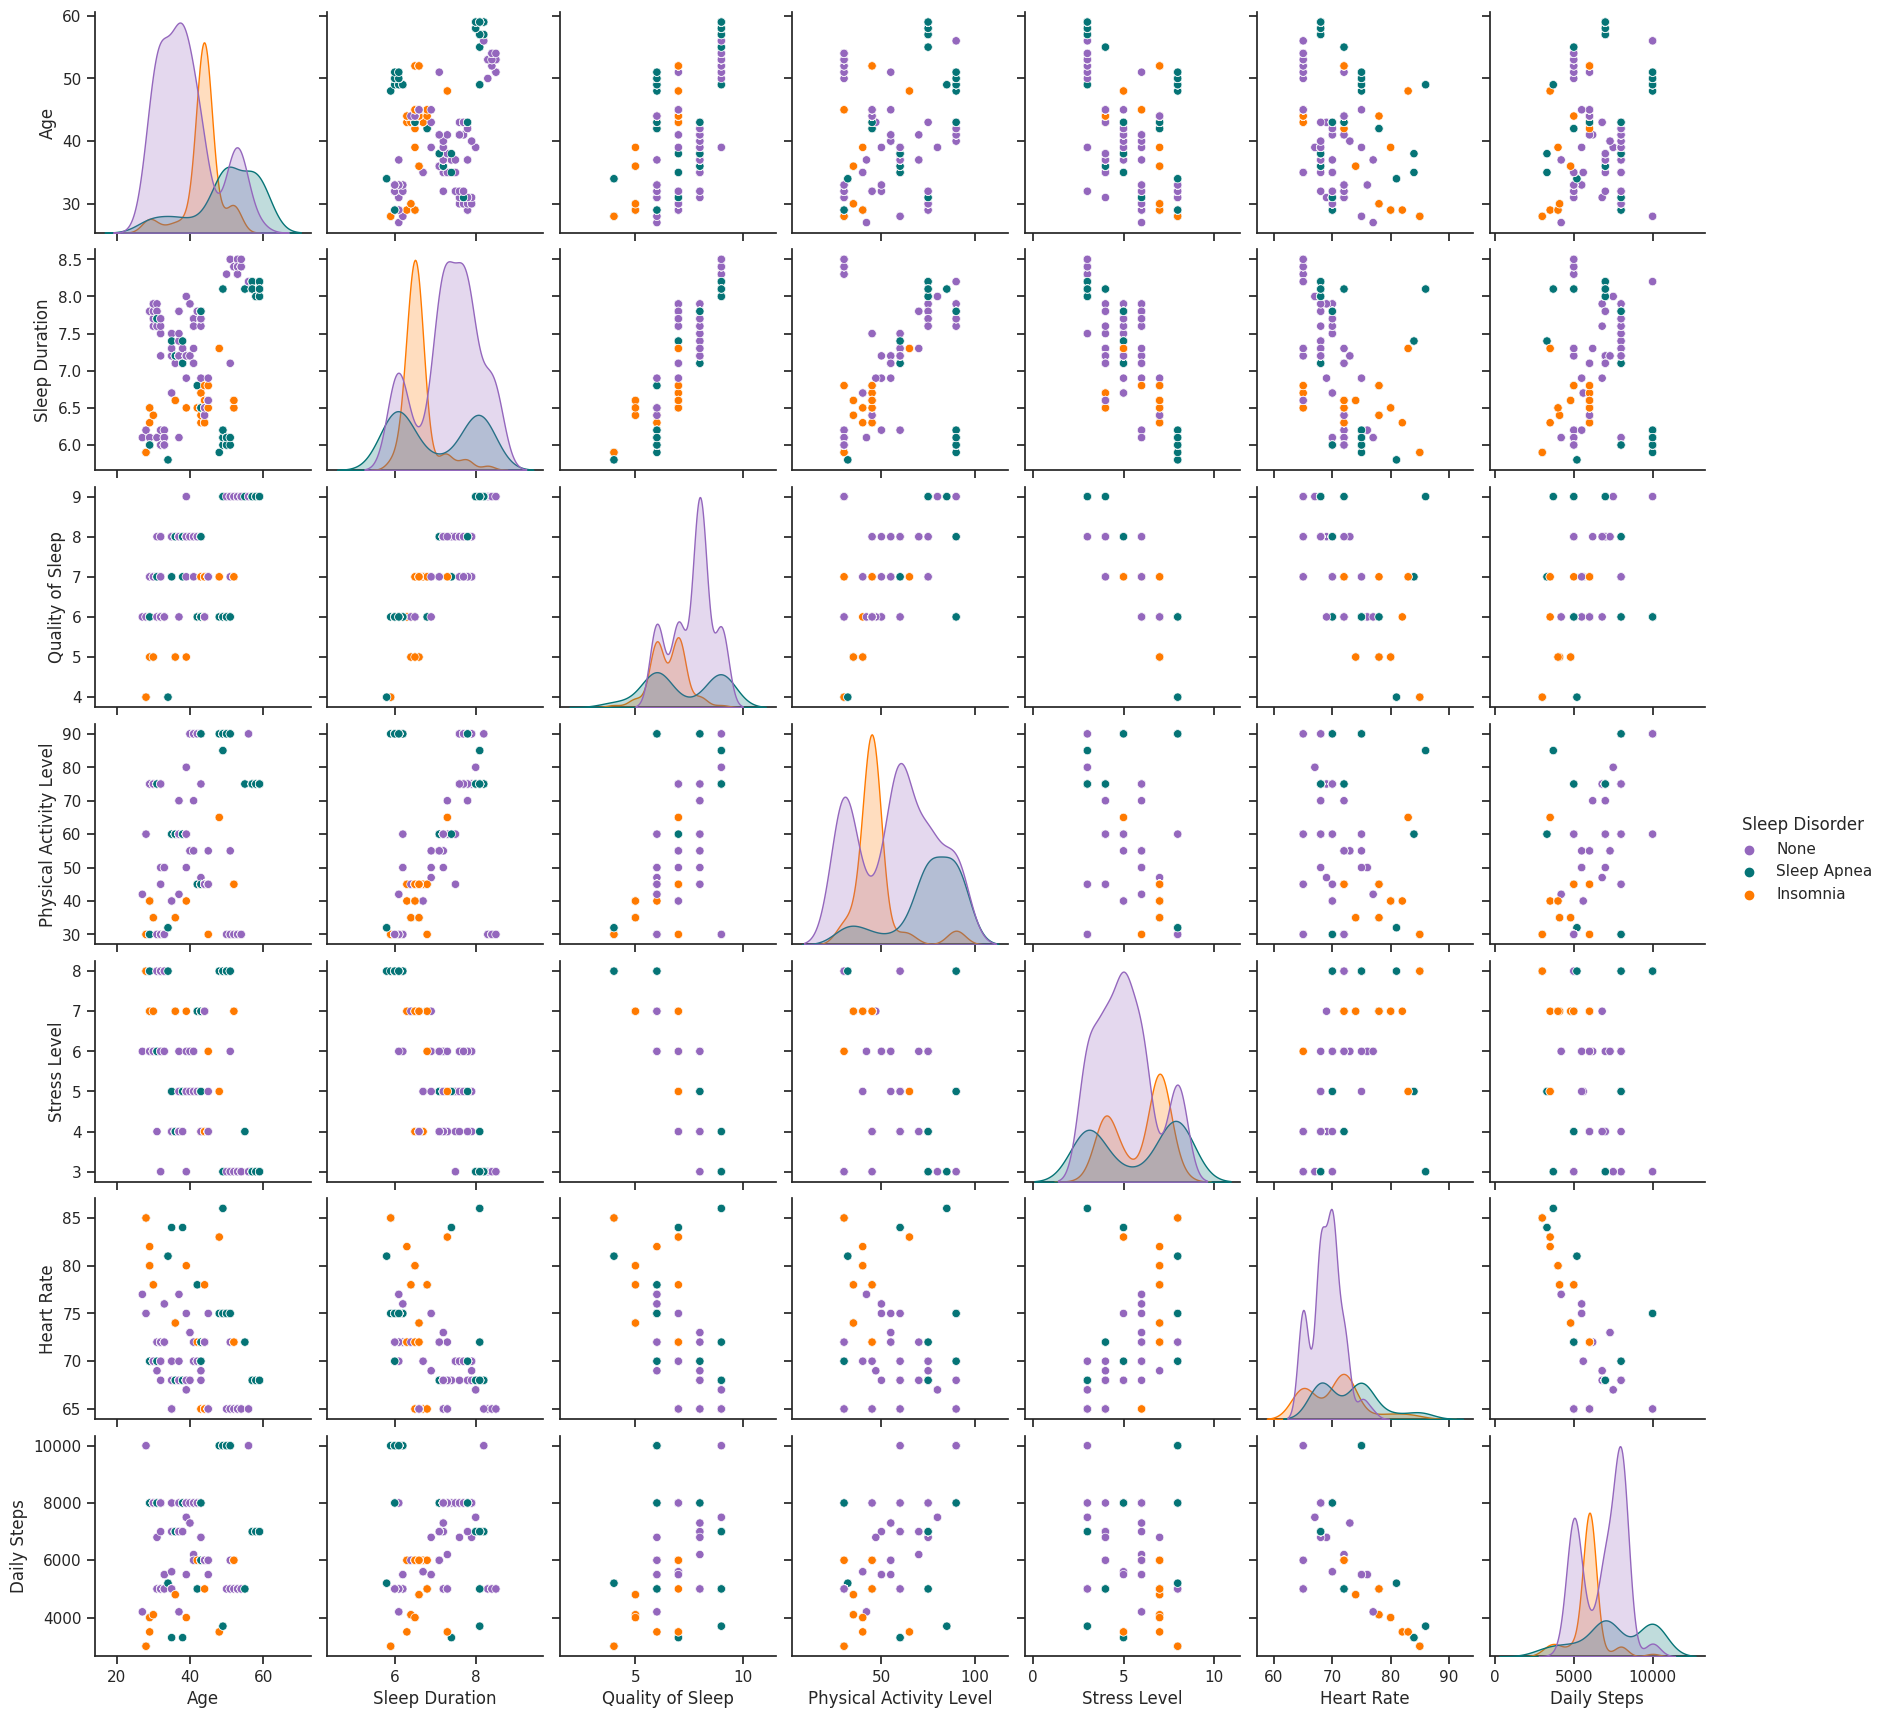

In [264]:
sns.pairplot(df, hue="Sleep Disorder")
plt.show()

É possível perceber com o gráfico acima que não existe nenhuma correlação negativa entre as variáveis relacionadas.

## 3. Insights

Com a ajuda das visualizações criadas, bem como da análise em relação ao dicionário de dados, as informações mais relevantes que conseguimos adquirir são:

- O gênero masculino existe em maior quantidade, mas com uma pequena diferença em relação ao gênero feminino.
- A ocupação Enfermeira (Nurse) é mais presente entre as pessoas.
- A maioria das pessoas possuem o IMC normal.
- A maioria das pessoas não possuem distúrbio do sono.
- A maioria dos indivíduos tem idade próximos de 45 anos.
- A distribuição da qualidade do sono tende a apresentar valores maiores do que 6.
- A frequência cardíaca apresenta na sua maior quantidade para valores menores que 76 bpm.
- A número de passos tem valores mais frequentes próximo de 8000 passos/dia.
- A pnéia do sono é dado em sua maioria ao sexo masculino.
- A insônia é apresentada em menor quantidade e com uma tendência maior de ter outliers, em todas as variáveis.
- Na variável nível de atividade físicas, nível de estresse e passos diários, o distúrbio do sono normal é igual para os dois gêneros.